In [71]:
## install.packages('zoo')
## install.packages('tseries')
library(forecast)
library(tseries)

In [20]:
file_loc <-"C:/Users/sds/Dropbox/(은행) RA 내재화/시장예측/" 
file <- "C:/Users/sds/Dropbox/(은행) RA 내재화/시장예측/지수예측자료.csv"

In [22]:
r <- read.csv(file)

In [23]:
head(r)

BASC_DT,.ATG,.AXJO,.BADI,.BCOMAGTR,.BCOMENTR,.BCOMINTR,.BCOMPRTR,.BCOMTR,.BSESN,...,USPMI.ECI,USUNR.ECI,XAG.,XAU.,XPD.,XPT.,ZAR.,aCNCLEADA.A,aCNUNRQ,aUSINCOXRP
2008-01-01 0:00,5207.44,6353.2,8891,163.034,546.684,381.088,267.102,374.170,20300.71,...,49.8,5,14.77,833.3,368,1520,6.8399,101.3992,4,314659000
2008-01-02 0:00,5207.44,6353.2,8891,163.034,546.684,381.088,267.102,374.170,20465.30,...,49.8,5,15.22,856.8,371,1538,6.8070,101.3992,4,314659000
2008-01-03 0:00,5133.33,6290.7,8756,165.685,541.130,396.492,270.144,376.855,20345.20,...,49.8,5,15.33,863.0,369,1550,6.8252,101.3992,4,314659000
2008-01-04 0:00,5112.22,6306.8,8702,165.007,538.842,390.074,269.202,374.745,20686.89,...,49.8,5,15.26,861.1,365,1541,6.8650,101.3992,4,314659000
2008-01-05 0:00,5112.22,6306.8,8702,165.007,538.842,390.074,269.202,374.745,20686.89,...,49.8,5,15.26,861.1,365,1541,6.8650,101.3992,4,314659000
2008-01-06 0:00,5112.22,6306.8,8702,165.007,538.842,390.074,269.202,374.745,20686.89,...,49.8,5,15.26,861.1,365,1541,6.8650,101.3992,4,314659000


In [11]:
str(r)

'data.frame':	3818 obs. of  128 variables:
 $ BASC_DT       : Factor w/ 3818 levels "2008-01-01 0:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ .ATG          : num  5207 5207 5133 5112 5112 ...
 $ .AXJO         : num  6353 6353 6291 6307 6307 ...
 $ .BADI         : int  8891 8891 8756 8702 8702 8702 8732 8730 8621 8333 ...
 $ .BCOMAGTR     : num  163 163 166 165 165 ...
 $ .BCOMENTR     : num  547 547 541 539 539 ...
 $ .BCOMINTR     : num  381 381 396 390 390 ...
 $ .BCOMPRTR     : num  267 267 270 269 269 ...
 $ .BCOMTR       : num  374 374 377 375 375 ...
 $ .BSESN        : num  20301 20465 20345 20687 20687 ...
 $ .BVSP         : num  62815 62815 62892 61037 61037 ...
 $ .CSI300       : num  5385 5385 5422 5484 5484 ...
 $ .DXY          : num  76 76 75.9 75.8 75.8 ...
 $ .FCHI         : num  5550 5550 5546 5447 5447 ...
 $ .FTMIB        : num  38035 38035 38063 37450 37450 ...
 $ .FTSE         : num  6417 6417 6479 6349 6349 ...
 $ .GDAXI        : num  7949 7949 7908 7809 7809 ...
 $ .HSCE  

ERROR: Error in `$<-.data.frame`(`*tmp*`, dt, value = structure(numeric(0), class = "Date")): replacement has 0 rows, data has 3818


In [44]:
r$BASC_DT2 <-as.character(r$BASC_DT) ## 날짜를 문자열화

In [48]:
r$BASC_DT3 <- substr(r$BASC_DT2, start=1, stop=10) ## 문자열화 된 %Y-%m-%d 부분을 추출
str(r$BASC_DT3)

 chr [1:3818] "2008-01-01" "2008-01-02" "2008-01-03" "2008-01-04" ...


In [50]:
r$BASC_DT4 <- as.Date(r$BASC_DT3) ##추출된 부분를 날짜화 
str(r$BASC_DT4) ## 최종값 

 Date[1:3818], format: "2008-01-01" "2008-01-02" "2008-01-03" "2008-01-04" "2008-01-05" ...


In [55]:
head(r)

BASC_DT,.ATG,.AXJO,.BADI,.BCOMAGTR,.BCOMENTR,.BCOMINTR,.BCOMPRTR,.BCOMTR,.BSESN,...,XAU.,XPD.,XPT.,ZAR.,aCNCLEADA.A,aCNUNRQ,aUSINCOXRP,BASC_DT2,BASC_DT3,BASC_DT4
2008-01-01 0:00,5207.44,6353.2,8891,163.034,546.684,381.088,267.102,374.170,20300.71,...,833.3,368,1520,6.8399,101.3992,4,314659000,2008-01-01 0:00,2008-01-01,2008-01-01
2008-01-02 0:00,5207.44,6353.2,8891,163.034,546.684,381.088,267.102,374.170,20465.30,...,856.8,371,1538,6.8070,101.3992,4,314659000,2008-01-02 0:00,2008-01-02,2008-01-02
2008-01-03 0:00,5133.33,6290.7,8756,165.685,541.130,396.492,270.144,376.855,20345.20,...,863.0,369,1550,6.8252,101.3992,4,314659000,2008-01-03 0:00,2008-01-03,2008-01-03
2008-01-04 0:00,5112.22,6306.8,8702,165.007,538.842,390.074,269.202,374.745,20686.89,...,861.1,365,1541,6.8650,101.3992,4,314659000,2008-01-04 0:00,2008-01-04,2008-01-04
2008-01-05 0:00,5112.22,6306.8,8702,165.007,538.842,390.074,269.202,374.745,20686.89,...,861.1,365,1541,6.8650,101.3992,4,314659000,2008-01-05 0:00,2008-01-05,2008-01-05
2008-01-06 0:00,5112.22,6306.8,8702,165.007,538.842,390.074,269.202,374.745,20686.89,...,861.1,365,1541,6.8650,101.3992,4,314659000,2008-01-06 0:00,2008-01-06,2008-01-06


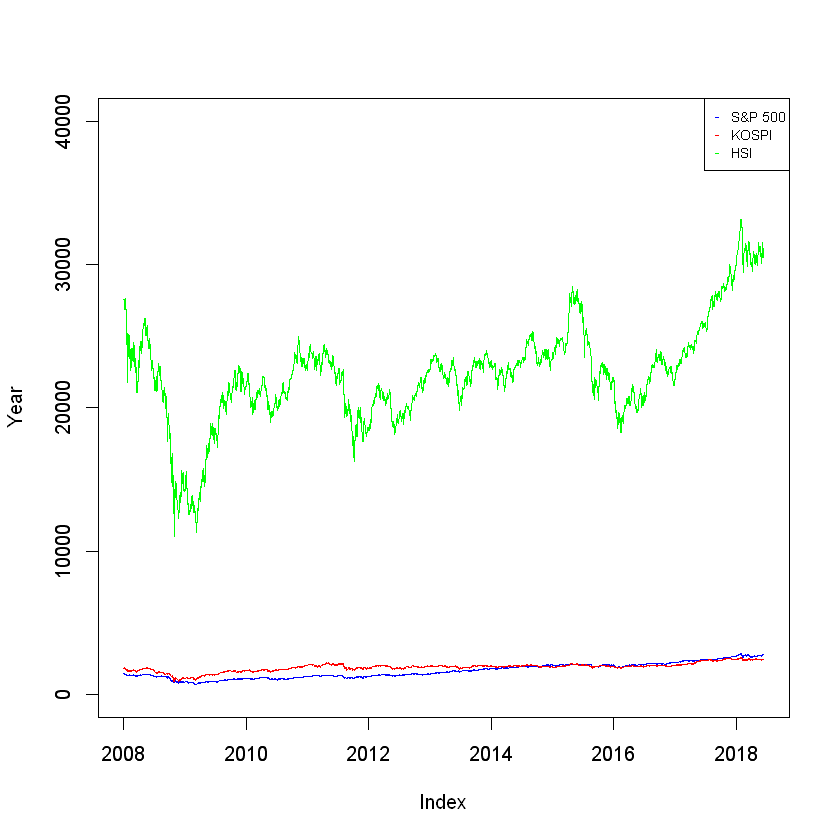

In [120]:
yrange <- c(0, 40000)

plot(r$BASC_DT4, r$.SPX, 
     ylab="Year",xlab="Index", 
     ylim=yrange,
     ## pch=4, ## pch 는 기호
     type="l", col='blue') ## type 은 표시형식

par(new=T)
plot(r$BASC_DT4, r$.KS11, 
     ylab=" ",xlab=" ", 
     ylim=yrange, 
     ## pch=0,
     type="l", col='red')

par(new=T)
plot(r$BASC_DT4, r$.HSI,
     ylab=" ",xlab=" ", 
     ylim=yrange, 
     ## pch=2,
     type="l", col='green')

legend("topright", 
       c("S&P 500","KOSPI","HSI"), 
       cex=0.7, 
       ## pch=c(2,0,4),
       pch=c('-','-','-'),
       col=c("blue","red","green"))

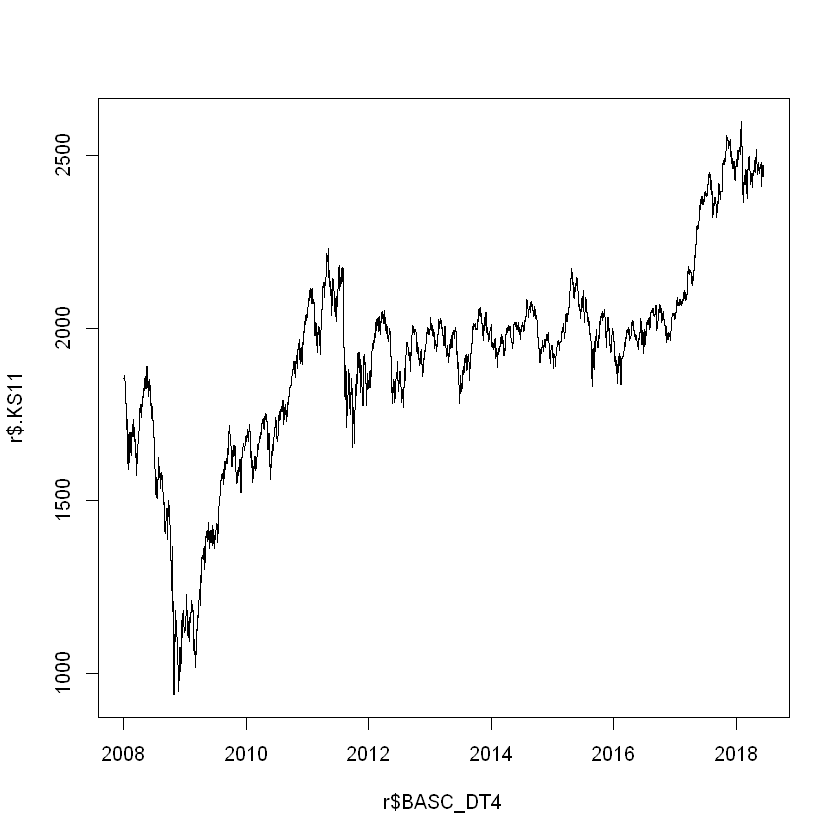

In [89]:
plot(r$BASC_DT4, r$.KS11, type="l")

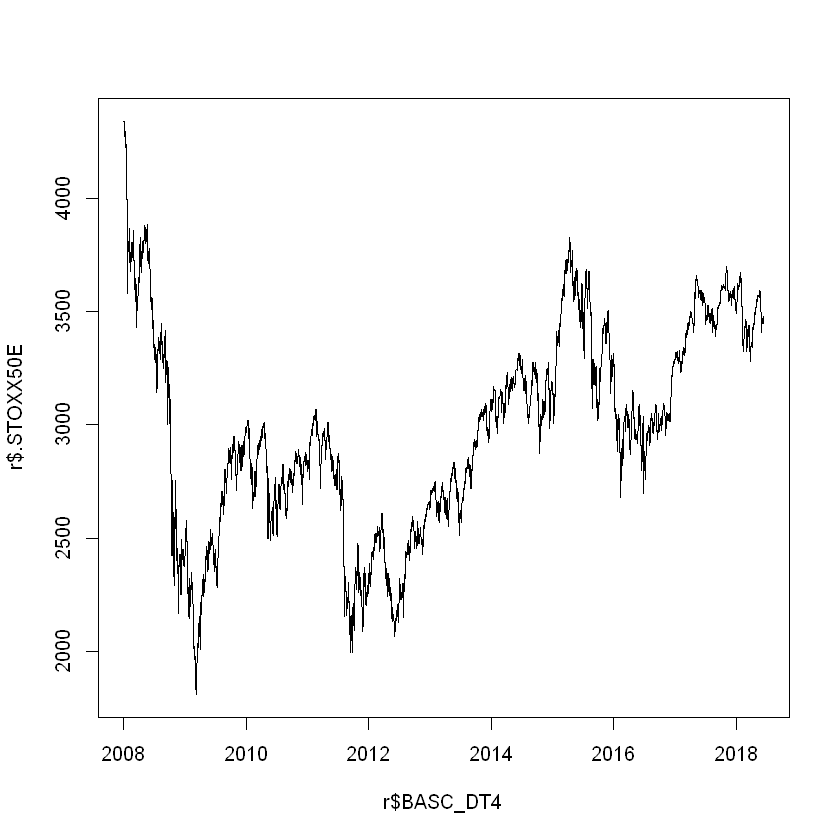

In [91]:
plot(r$BASC_DT4, r$.STOXX50E, type="l")

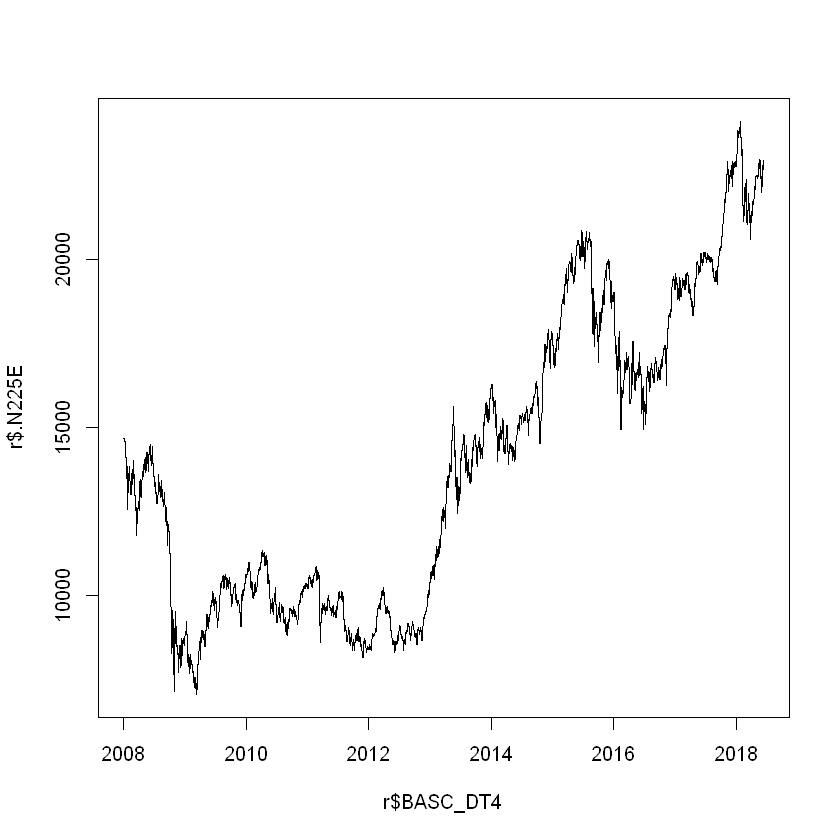

In [96]:
plot(r$BASC_DT4, r$.N225E, type="l")

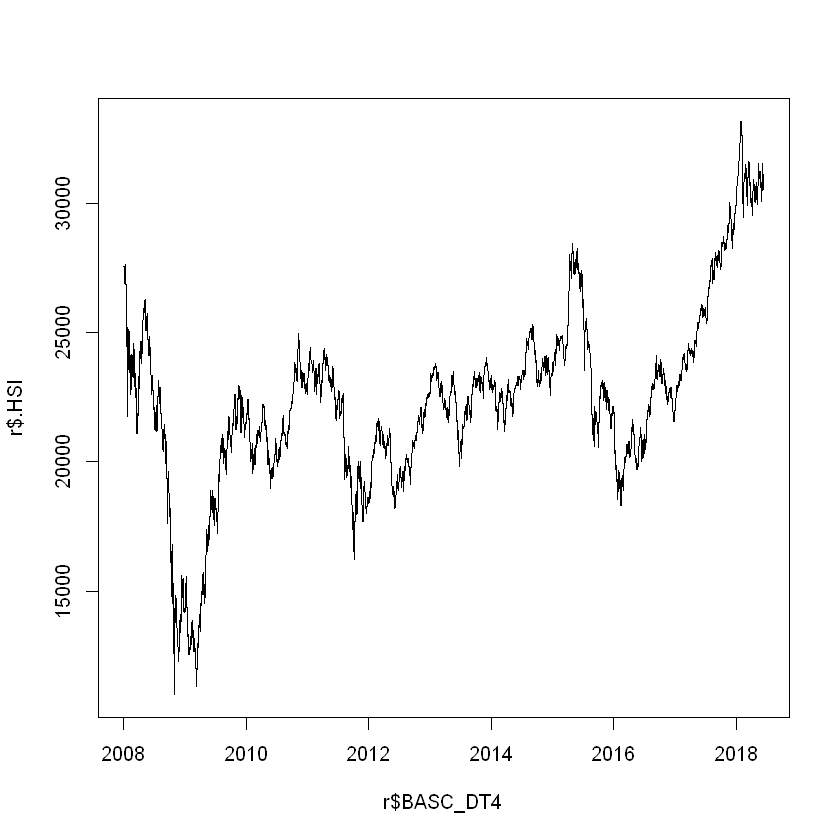

In [118]:
plot(r$BASC_DT4, r$.HSI, type="l")

In [88]:
adf.test(diff(log(r$.SPX)), alternative="stationary", k=0)

Warning message in adf.test(diff(log(r$.SPX)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(r$.SPX))
Dickey-Fuller = -68.934, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [75]:
adf.test(diff(r$.SPX), alternative="stationary", k=0)

Warning message in adf.test(diff(r$.SPX), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(r$.SPX)
Dickey-Fuller = -66.871, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [76]:
auto.arima(diff(r$.SPX))

Series: diff(r$.SPX) 
ARIMA(3,0,4) with non-zero mean 

Coefficients:
         ar1     ar2     ar3      ma1      ma2      ma3      ma4    mean
      0.0294  0.0723  0.6086  -0.1068  -0.0751  -0.5692  -0.0191  0.3431
s.e.  0.1227  0.1181  0.1077   0.1236   0.1231   0.1098   0.0222  0.1795

sigma^2 estimated as 195.8:  log likelihood=-15483.66
AIC=30985.32   AICc=30985.36   BIC=31041.54

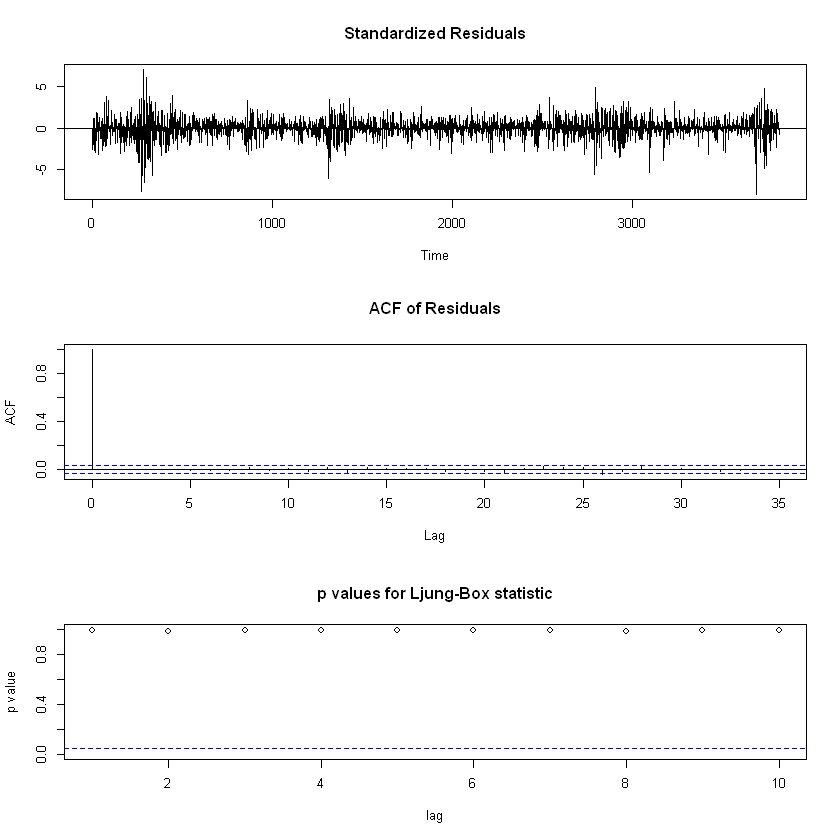

In [78]:
tsdiag(auto.arima(diff((r$.SPX))))

In [79]:
fit <- arima(r$.SPX, c(1, 0, 1), seasonal = list(order = c(0, 1, 1),period = 12))

In [81]:
summary(fit)


Call:
arima(x = r$.SPX, order = c(1, 0, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
         ar1      ma1     sma1
      0.9998  -0.0795  -0.9937
s.e.  0.0003   0.0161   0.0043

sigma^2 estimated as 197.9:  log likelihood = -15488.34,  aic = 30984.68

Training set error measures:
                    ME     RMSE      MAE        MPE      MAPE     MASE
Training set 0.3387261 14.04572 8.498675 0.01352811 0.5871193 1.051278
                      ACF1
Training set -0.0006983168


In [82]:
pred <- predict(fit, n.ahead = 10*12)

ts.plot(r$.SPX,2.718^pred$pred, log = "y", lty = c(1,3))

ERROR: Error in .cbind.ts(list(...), .makeNamesTs(...), dframe = dframe, union = TRUE): non-time series not of the correct length
